## automatedSNAC

An Ipython notebook to explore the base model

In [2]:
# import diamond.Diamond and SNACmodel.AggregationModel
from snac.diamond import Diamond
from snac.SNACmodel import AggregationModel

### 1) Diamond parameters

In [2]:
# ages in Ma:
age_core = 3520
age_rim = 1860
age_kimberlite = 0

# Nitrogen data (total N concentration in ppm and proportion of B-centres 0-1):
# core:
c_NT = 625
c_agg = 0.863

# rim:
r_NT = 801
r_agg = 0.197

# create Diamond instance
diamond = Diamond(
    age_core=age_core,
    age_rim=age_rim,
    age_kimberlite=age_kimberlite,
    c_NT=c_NT,
    c_agg=c_agg,
    r_NT=r_NT,
    r_agg=r_agg,
    )

print(diamond)

# optional: save diamond data to JSON file
diamond.to_json("example_diamond.json")

Diamond with core age 3520 Ma,
rim age 1860 Ma,
and kimberlite age 0 Ma.
Core: [N_T] 625 ppm, 86.3%B.
Rim: [N_T] 801 ppm, 19.7%B.


### 2) Model parameters

In [3]:
# time step in Ma, e.g. 1 Ma
dt = 1

# first guess for starting temperature (deg.C) and cooling rate (K/Gyr):
cooling_rate0 = 0.01
T_start0 = 1200

# boundaries for starting Temperature:
T_bounds = (1000, 1450)

# boundaries for cooling rate:
rate_bounds = (0.001, 0.12)
#rate_bounds = (1e-06, 1e-04)


### 3) Run model

In [4]:
# create aggregation model instance
model = AggregationModel(
    diamond=diamond,
    cooling_rate0=cooling_rate0,
    T_start0=T_start0,
    rate_bounds=rate_bounds,
    T_bounds=T_bounds,
    dt=1,
)

print(model)

# calculate thermal history and nitrogen aggregation
model.optimise_history()

AggregationModel:
for Diamond with core age 3520 Ma,
rim age 1860 Ma,
and kimberlite age 0 Ma.
Core: [N_T] 625 ppm, 86.3%B.
Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: continuous
with parameters: None
Initial T: 1200 deg.C
Initial cooling rate: 10.0 K/Gyr


### 4) Plot and save data

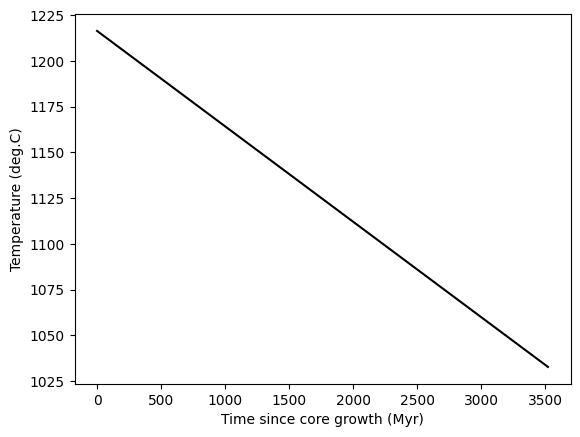

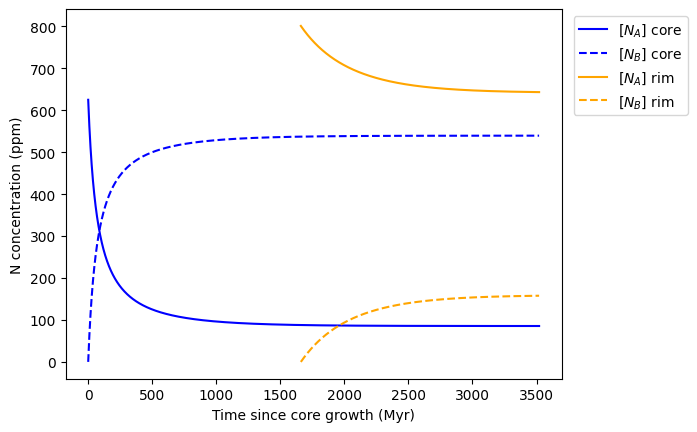

In [5]:
# plot results
model.plot_T_history()
model.plot_aggregation_history(rim_start=True)

In [6]:
# optional: print model results
print(model)

# optional: save model output to CSV file
model.save_history('SNACoutput.csv')

AggregationModel:
for Diamond with core age 3520 Ma,
rim age 1860 Ma,
and kimberlite age 0 Ma.
Core: [N_T] 625 ppm, 86.3%B.
Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: continuous
with parameters: None
Initial T: 1200 deg.C
Initial cooling rate: 10.0 K/Gyr

Fitted model results:
Starting T: 1216.32 deg.C
Cooling rate: 52.17 K/Gyr


## Diamond or model from json file

Instead of hard-coding ages, nitrogen concentrations and aggregation states for the diamond in question, data can be read in the form of json file(s). Similarly, a model can be read from a json file.

In [7]:
diamond_file = 'example_diamond.json'

diamond = Diamond.from_json(diamond_file)

print(diamond)

Diamond with core age 3520 Ma,
rim age 1860 Ma,
and kimberlite age 0 Ma.
Core: [N_T] 625 ppm, 86.3%B.
Rim: [N_T] 801 ppm, 19.7%B.


In [3]:
model_file = 'example_model.json'

model = AggregationModel.from_json(model_file)

print(model)

AggregationModel:
for Diamond with core age 3520 Ma,
rim age 1860 Ma,
and kimberlite age 0 Ma.
Core: [N_T] 625 ppm, 86.3%B.
Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: continuous
with parameters: None
Initial T: 1200 deg.C
Initial cooling rate: 10.0 K/Gyr
